In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

In [2]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# loading the dataset

In [4]:
ds = pd.read_csv('/kaggle/input/nifty50-stock-market-data/HCLTECH.csv')

In [5]:
ds.head(30)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


# data preprocessing


### -> dropping missing values

In [6]:
hcl = ds.dropna()


In [7]:
hcl.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [8]:
hcl.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2844,2011-06-01,HCLTECH,EQ,514.80,511.40,516.00,509.00,514.75,514.40,512.70,287699,1.475043e+13,4845.0,146731.0,0.5100
2845,2011-06-02,HCLTECH,EQ,514.40,509.00,515.25,508.70,514.75,513.70,512.86,307689,1.578028e+13,6701.0,144265.0,0.4689
2846,2011-06-03,HCLTECH,EQ,513.70,512.05,517.50,508.90,513.70,512.35,513.58,379167,1.947326e+13,9447.0,143384.0,0.3782
2847,2011-06-06,HCLTECH,EQ,512.35,508.05,514.00,505.05,509.10,509.50,508.07,285294,1.449495e+13,5368.0,100251.0,0.3514
2848,2011-06-07,HCLTECH,EQ,509.50,504.05,514.95,504.05,511.95,511.80,510.77,403694,2.061968e+13,8530.0,262636.0,0.6506


### -> setting the date column as index of our dataset

In [9]:
hcl.index = pd.to_datetime(hcl.Date)


In [10]:
hcl.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2011-06-01,2011-06-01,HCLTECH,EQ,514.80,511.40,516.00,509.00,514.75,514.40,512.70,287699,1.475043e+13,4845.0,146731.0,0.5100
2011-06-02,2011-06-02,HCLTECH,EQ,514.40,509.00,515.25,508.70,514.75,513.70,512.86,307689,1.578028e+13,6701.0,144265.0,0.4689
2011-06-03,2011-06-03,HCLTECH,EQ,513.70,512.05,517.50,508.90,513.70,512.35,513.58,379167,1.947326e+13,9447.0,143384.0,0.3782
2011-06-06,2011-06-06,HCLTECH,EQ,512.35,508.05,514.00,505.05,509.10,509.50,508.07,285294,1.449495e+13,5368.0,100251.0,0.3514
2011-06-07,2011-06-07,HCLTECH,EQ,509.50,504.05,514.95,504.05,511.95,511.80,510.77,403694,2.061968e+13,8530.0,262636.0,0.6506


In [11]:
hcl.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

### -> selecting the column as our original time series data from the dataset

In [12]:
hcl = hcl["Prev Close"]['2013-01-01':'2013-12-02']


In [13]:
hcl.head()

Date
2013-01-01    618.70
2013-01-02    622.15
2013-01-03    625.25
2013-01-04    625.95
2013-01-07    634.05
Name: Prev Close, dtype: float64

In [14]:
hcl.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

# data exploration

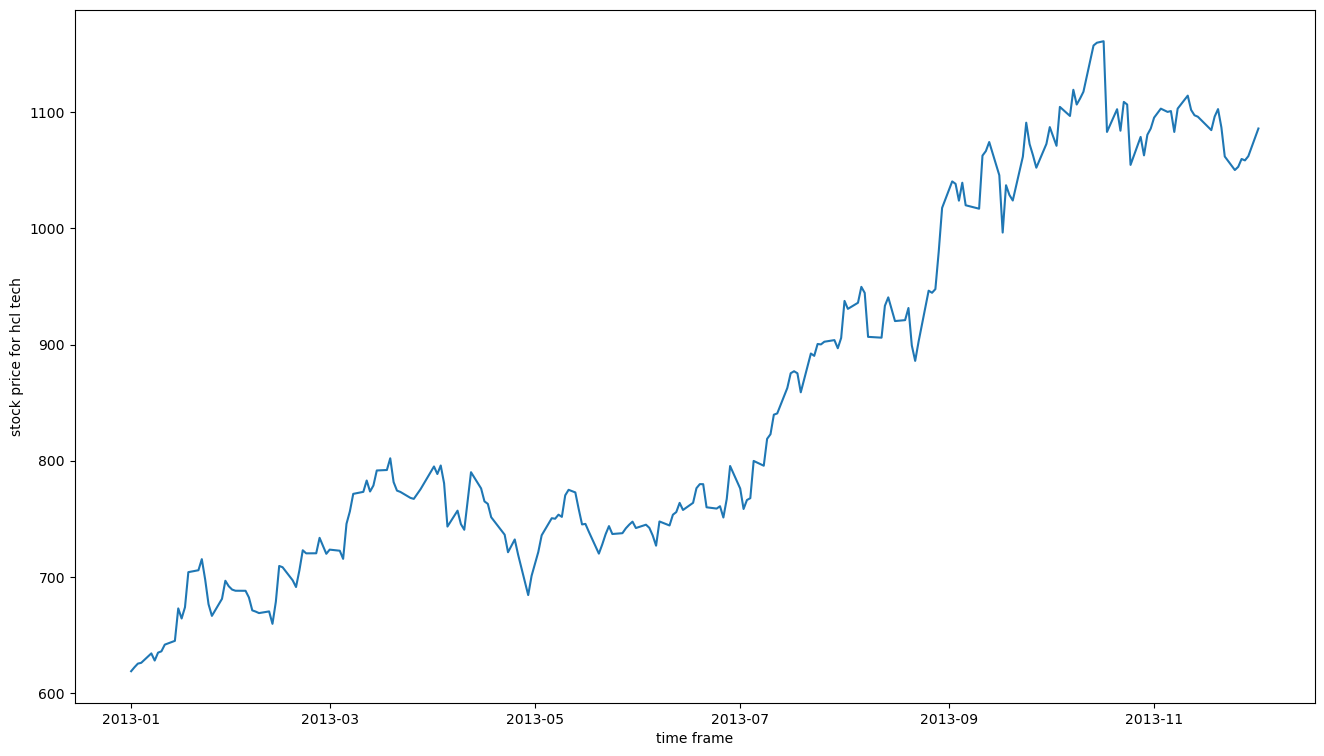

In [15]:
# Data Exploration

plt.figure(figsize=(16,9))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('time frame')
ax1.set_ylabel('stock price for hcl tech')
ax1.plot(hcl)

no clear seasonality is observed we can observe an upward trend

# checking stationarity

In [16]:
result = adfuller(hcl)
print("adf statistic  : ", result[0])
print("p value : ",result[1])
print("critical values : ",result[4])

adf statistic  :  -0.8157444643227588
p value :  0.8144534467261184
critical values :  {'1%': -3.4592326027153493, '5%': -2.8742454699025872, '10%': -2.5735414688888465}


null hypothesis : not stationery , p value !< 0.05 so it means that its not stationery
so we convert it to stationery using log and differences

# making data stationery

### -> applying the log transformations

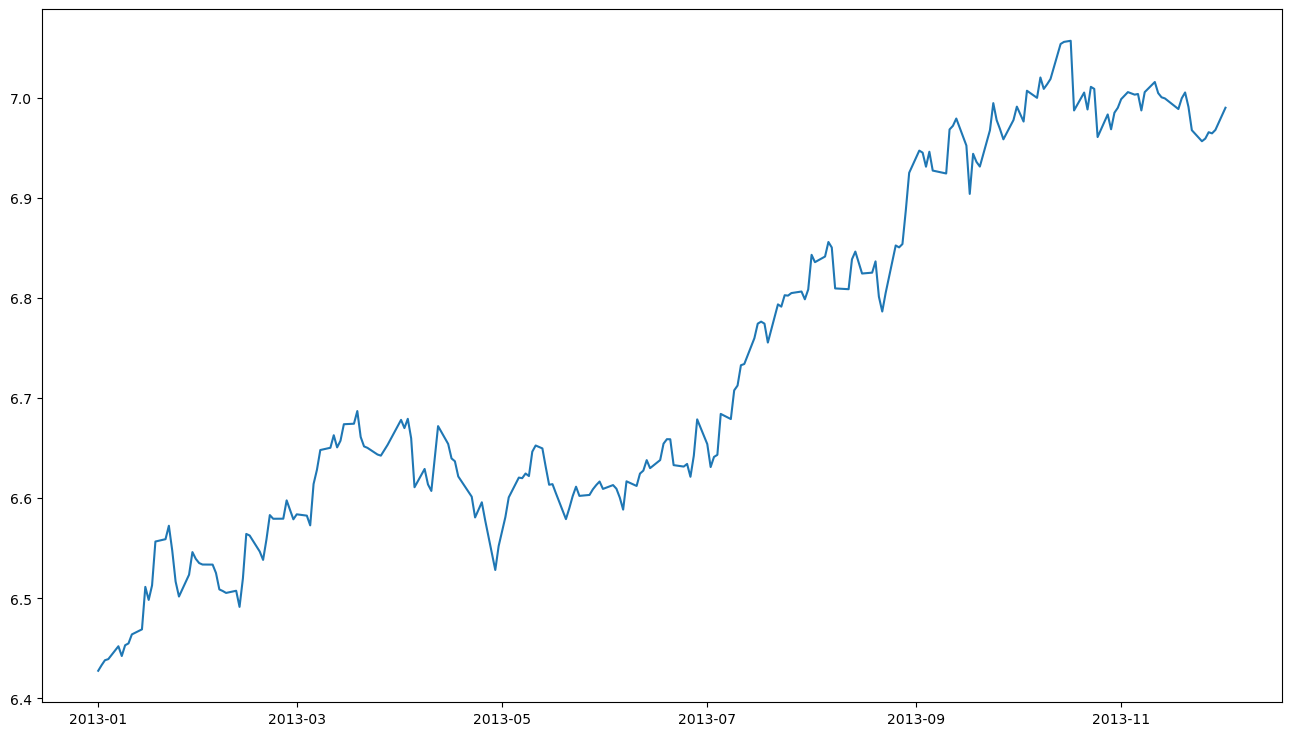

In [17]:
# transformation using log
plt.figure(figsize=(16,9))
fig=plt.figure(1)

ts_log = np.log(hcl)
plt.plot(ts_log)

we can see that even after transforming using log the time series data is not stationery bcz a time series data will not show an upward trend like this as shown in the image above

since to be stationery the mean and std should be  almost constant between any two pair of pts in the graph

if we pick two point 
one in the lower part : the value is less
one in the higher part  : the values are too high

the difference between the mean of both the points would be too much so it cannot be considered as stationery.

so now we try differencing on the log values

here we shift the log values by one bit and subtract them from the original log values

### -> differencing the log values

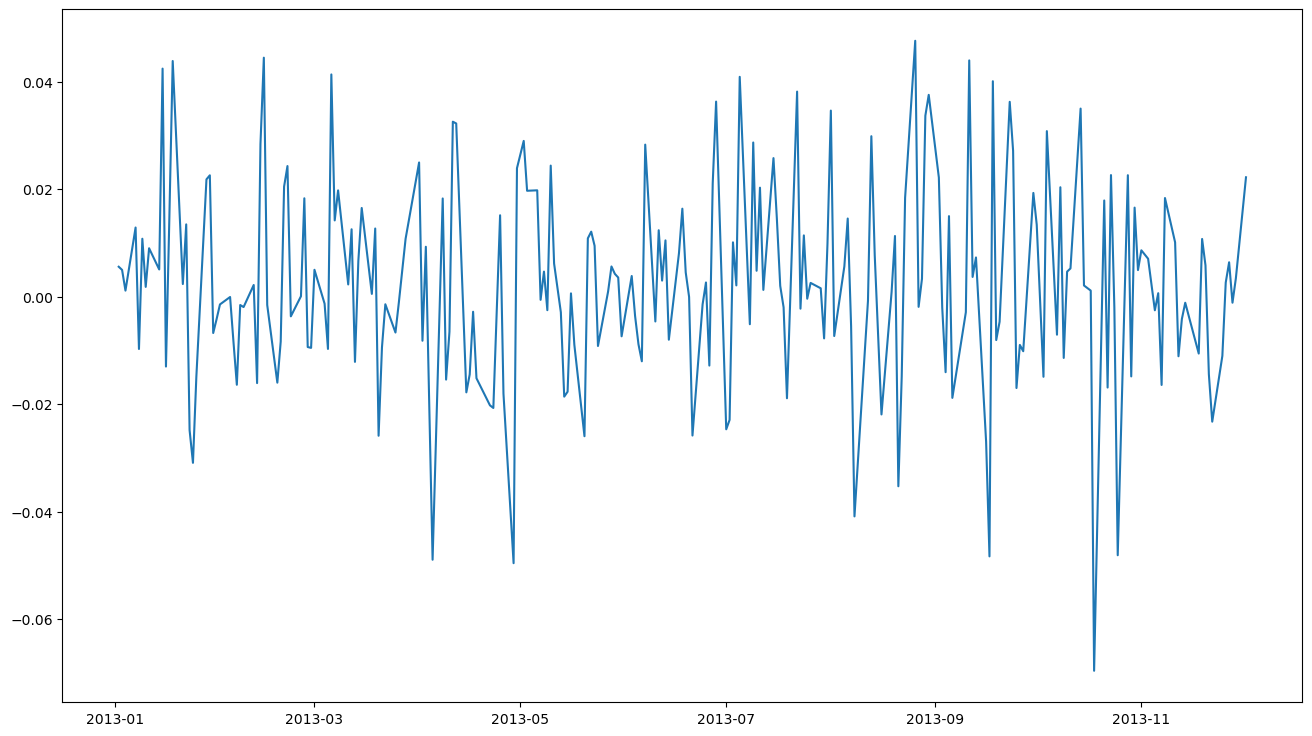

In [18]:
# differencing
plt.figure(figsize=(16,9))
fig = plt.figure(1)

ts_log_diff = ts_log-ts_log.shift()
plt.plot(ts_log_diff)

now we can say that the time series has become stationery since it doesnt have any upward trend so now if we calculate the mean between any two sets of points it will almost be close enough.

### -> confirming stationarity

now we will cross check wether our time sereis is stationery or not and this time we use rolling mean method by plotting graphs

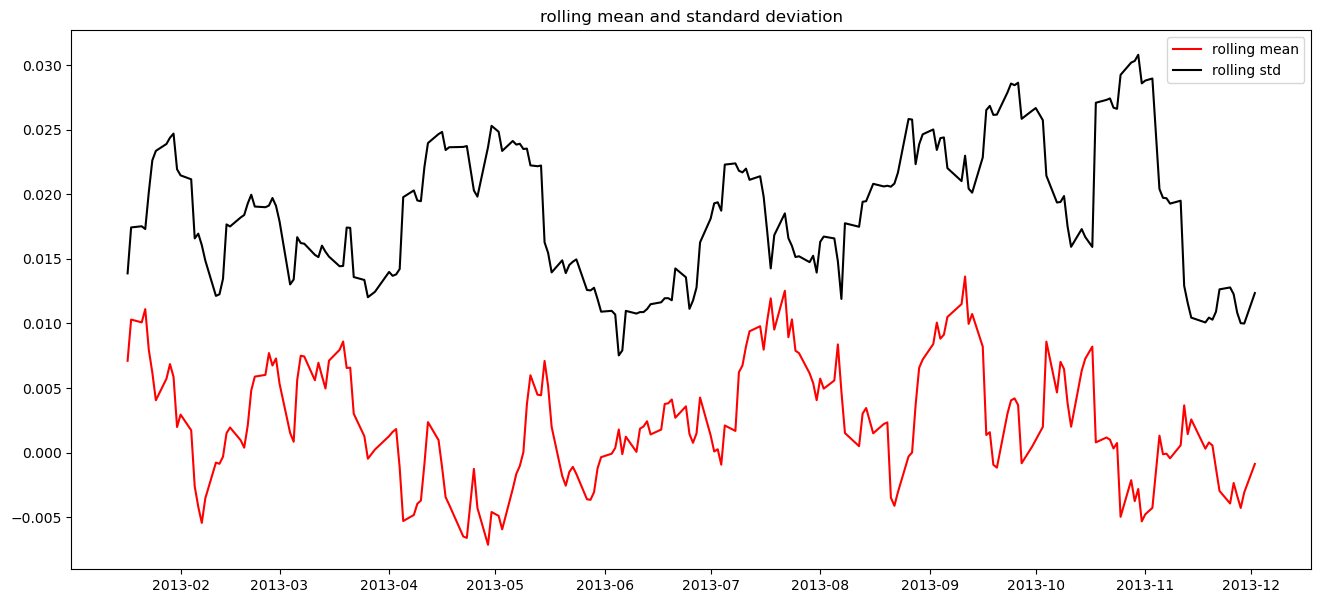

In [19]:
rollmean = ts_log_diff.rolling(12).mean() 
rollstd = ts_log_diff.rolling(12).std()

plt.figure(figsize=(16,7))
mean = plt.plot(rollmean,label = 'rolling mean',color='red')
std = plt.plot(rollstd , label='rolling std',color='black')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')
plt.show(block=False)

now we can see that the mean and standard deviation have almost no trend so we can conclude  that our time series is stationery now !! 

# model creation

In [20]:
hcl.sort_index(inplace=True)

In [21]:
from statsmodels.tsa.stattools import acf,pacf
log_acf = acf(ts_log_diff,nlags=20)
log_pacf = pacf(ts_log_diff,nlags=20)

# selecting ar and ma terms

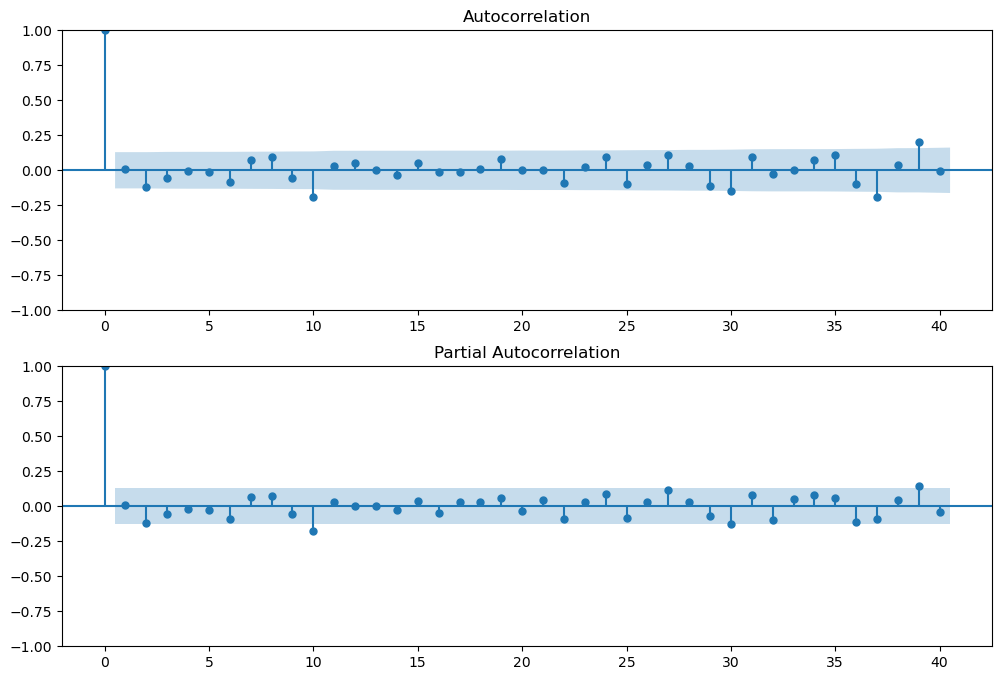

In [22]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)


from this graph we decide the values for 
AR(auto regressive) term  and the MA(moving average) term :

in the graph inisde the blue boundary the first point which touches the blue boundary  or crosses it is the best value for 
AR(p) in the 1st graph and same for MA (q) in the 2nd graph

so from the graph we can observe that the values will pe ar(p)=2, ma(q) = 2 ad we will take d=2 differences term by hit and trial

# fitting the model and prediction of values

In [23]:
from statsmodels.tsa.arima.model import ARIMA

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/o

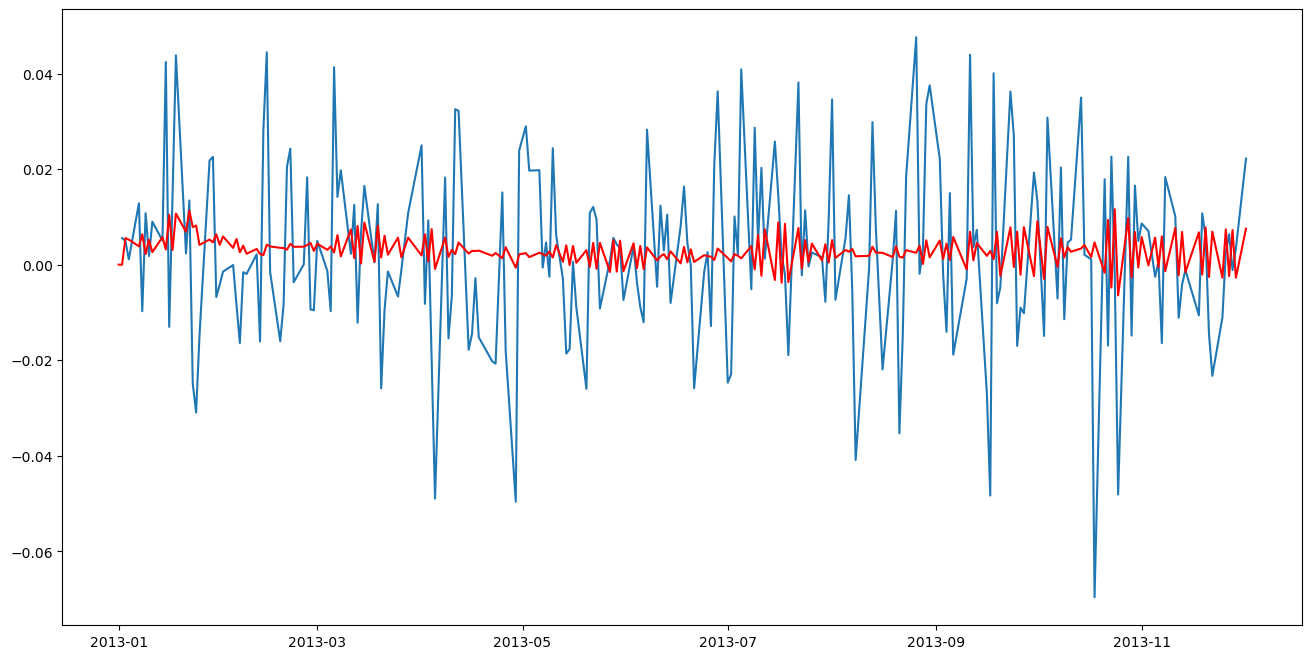

In [24]:
plt.figure(figsize=(16,8))
model = ARIMA(ts_log_diff,order=(2,1,2))
results_arima = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

these red values are the fitted values and the blue is the original values this graph shows how well our arima model is fitting our original values 

we can see that its not good 

so we try and change our values of p,d,q either manually or by tuning the model using auro_arima

or we can  make our model  more stationery by using different transformation techniques and then again try fitting it

In [25]:
r = results_arima.predict(10,60)

In [26]:
r[0:6]

Date
2013-01-15    0.003174
2013-01-16    0.010429
2013-01-17    0.003083
2013-01-18    0.010706
2013-01-21    0.006890
2013-01-22    0.011336
Name: predicted_mean, dtype: float64

here i am using auto arima which is a tuning model 

here i will input different values of p,d,q and it will return me the best possible values of p,d,q based on my input values

# model tuning

In [27]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pmdarima as pm

In [29]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p=2,
                             start_q=2,
                              max_p=10,
                              max_q=10,
                              test='adf',
                              seasonal=True,
                              trace=True
                             )
    return automodel

In [30]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1163.846, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.993 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

### -> fitting using tuned model

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


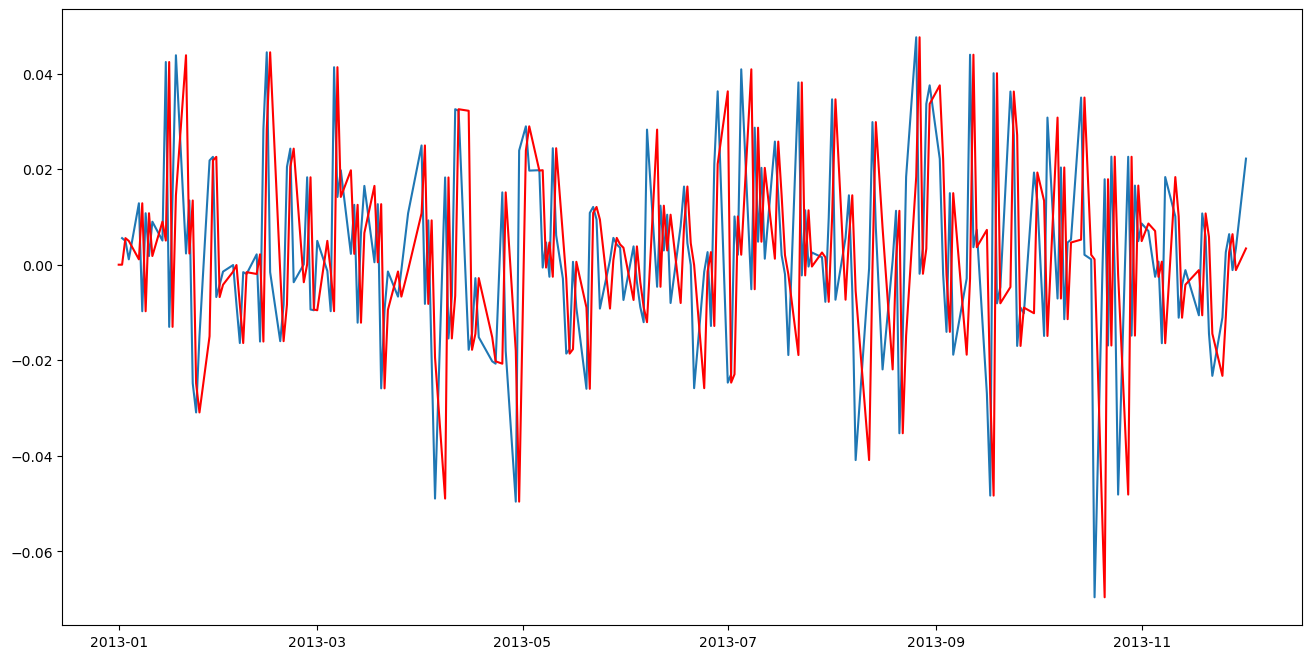

In [31]:
plt.figure(figsize=(16,8))
model2 = ARIMA(ts_log_diff,order=(0,1,0))
results_arima = model2.fit()
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

after tuning our model we got the values for (p,d,q) = (0,1,0) 

i applied those values to my model again and plotted the fitted model 

and as we can see that our fitted model(red) is fitting so well on our original model(blue) 
this is our final resulting model. !!